1.Data Loading and Exploration (EDA)

2.Data Visualization

3.Data Preprocessing,

4.Model Selection and Hyperparameter Tuning,

5.Model Evaluation,

6.Results Visualization.

In [1]:
#Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the dataset
iris = pd.read_csv('/content/Iris.csv')

# Exploratory Data Analysis (EDA)

In [4]:
print(iris.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [5]:
print(iris.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [6]:
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


# Data visualization

<Figure size 1000x800 with 0 Axes>

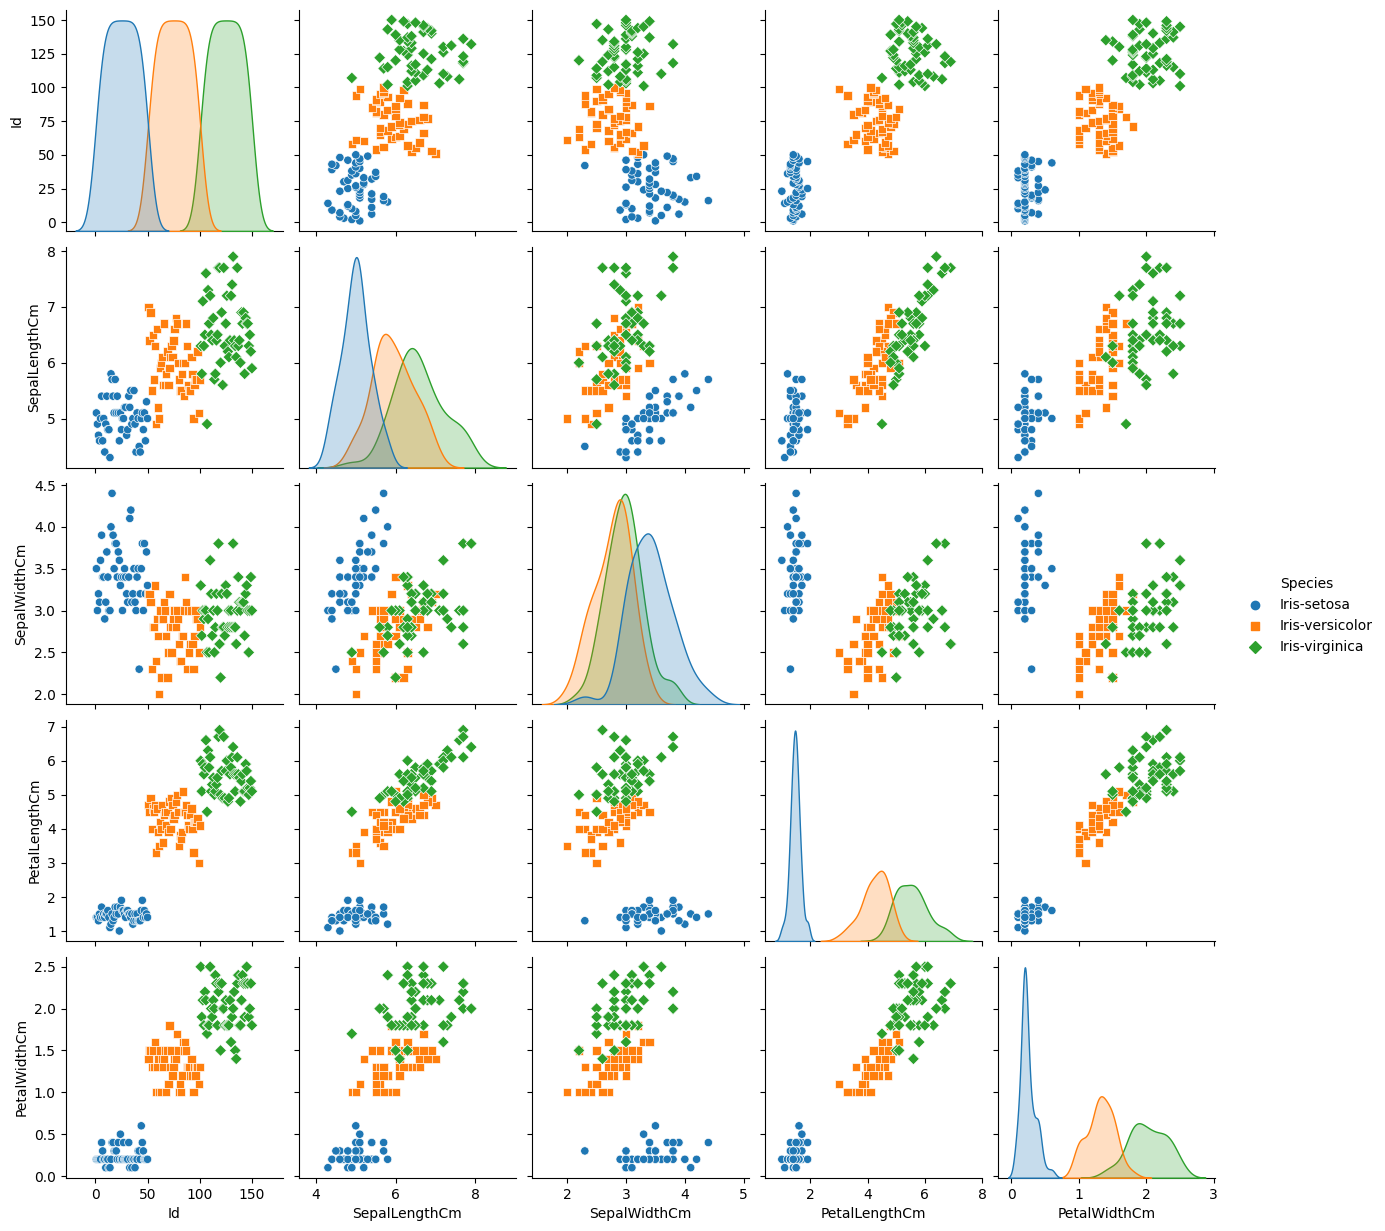

In [7]:
plt.figure(figsize=(10, 8))
sns.pairplot(iris, hue='Species', markers=["o", "s", "D"])
plt.show()

# Data preprocessing



In [8]:
X = iris.drop('Species', axis=1)
y = iris['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Model selection and hyperparameter tuning
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machines': SVC(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}


In [11]:
param_grids = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10]},
    'Support Vector Machines': {'C': [0.001, 0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'KNN': {'n_neighbors': [3, 5, 7, 9]},
    'Decision Tree': {'max_depth': [None, 10, 20, 30]},
}

In [13]:
best_models = {}

for model_name, model in models.items():
    if model_name == 'Naive Bayes':
        best_models[model_name] = model.fit(X_train_scaled, y_train)
    else:
        grid_search = GridSearchCV(model, param_grid=param_grids[model_name], cv=5)
        grid_search.fit(X_train_scaled, y_train)
        best_models[model_name] = grid_search.best_estimator_


In [14]:
# Model evaluation
results = []

for model_name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=iris['Species'].unique())
    results.append({'Model': model_name, 'Accuracy': accuracy, 'Confusion Matrix': cm, 'Classification Report': report})

In [22]:
# Display results
for result in results:
    print(result['Model'])
    print("Accuracy:", "{:.2f}%".format(result['Accuracy'] * 100))
    print("Confusion Matrix:\n", result['Confusion Matrix'])
    print("Classification Report:\n", result['Classification Report'])

Logistic Regression
Accuracy: 100.00%
Confusion Matrix:
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38

Support Vector Machines
Accuracy: 100.00%
Confusion Matrix:
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted av

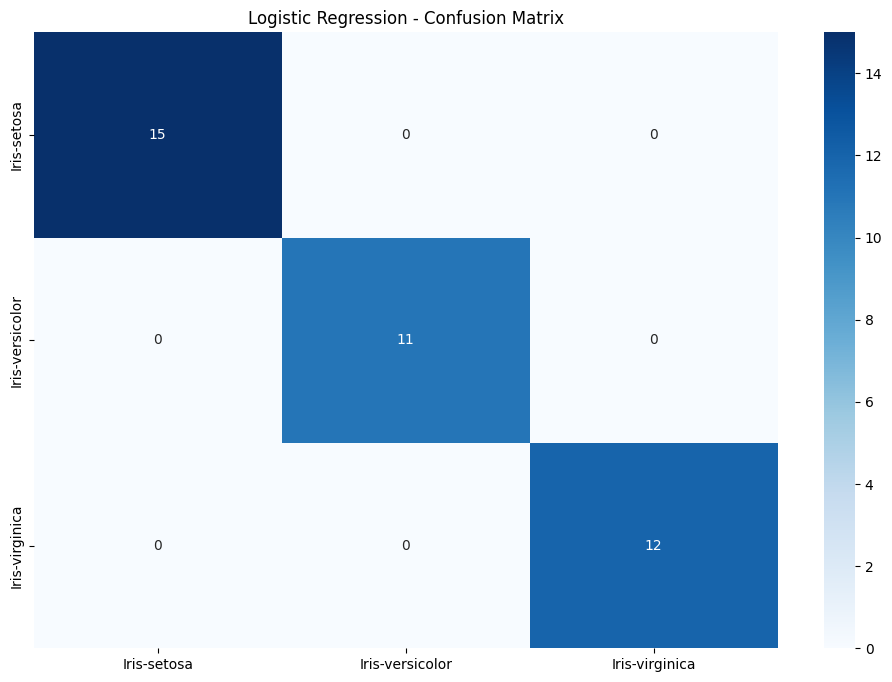

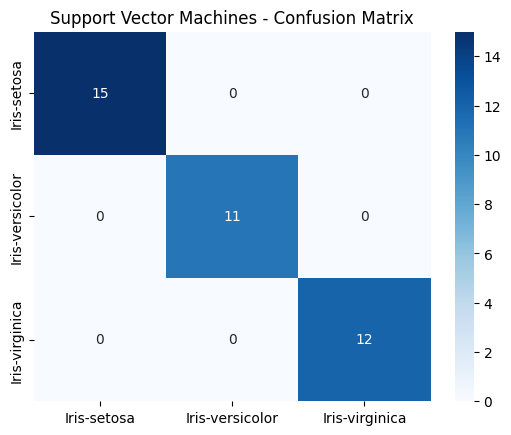

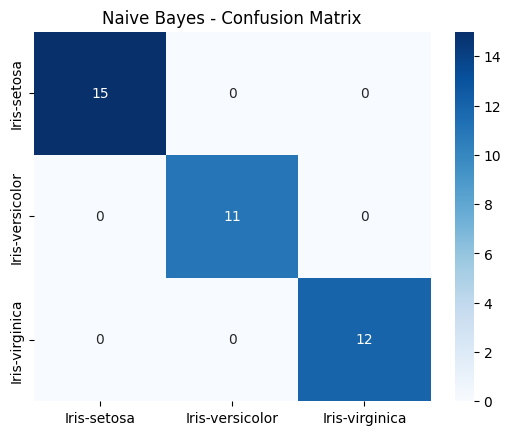

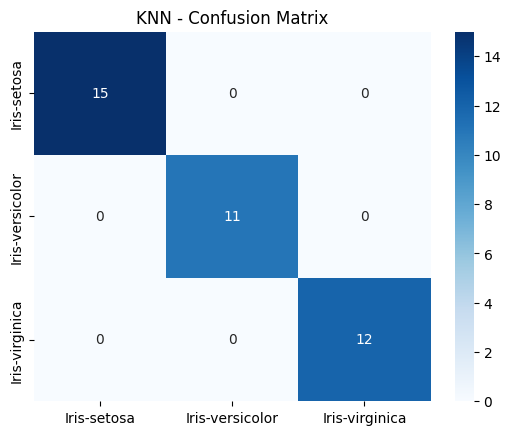

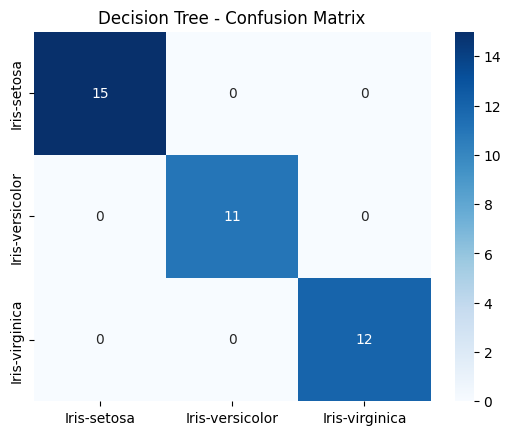

In [21]:
# Visualization of results
plt.figure(figsize=(12, 8))
for result in results:
    sns.heatmap(result['Confusion Matrix'], annot=True, fmt='d', cmap='Blues',
                xticklabels=iris['Species'].unique(), yticklabels=iris['Species'].unique())
    plt.title(result['Model'] + " - Confusion Matrix")
    plt.show()